## Circumstellar desnsity structure

We use a density distribution that drops off as $r^{-2}$, following a power law profile. This relationship is more common in density structure created by a Type II pre-supernova mass-loss. We make the  assumption that the supernova ejecta is uniformly expanding in the regime of free initial expansion. That is, in the free expansion phase, the shock radius scales as 

\begin{equation}
 R_{sh} = V_{sh}\,t
\end{equation}

where $V_{sh}$ is the shock velocity and $t$ is the time since explosion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as unt
import scipy.integrate as integrate
from matplotlib import rc, rcParams

In [48]:
## To use LaTeX and select Helvetica as the default font, without editing matplotlibrc use:
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

rc('text', usetex=True)
# activate latex text rendering
rc('axes', linewidth=2)
rc('font', weight='bold')
rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


We model the radio light curve from the reference radius of a Red Super Giant $R_* = 1000R_{\odot}$ corrensponding to the outer shell radius at our first epoch ($t = 2\, \mbox{days}$). This corresponds to 

In [49]:
# Setting up the radius from the center of the explosion.

pos_x = np.linspace(2.2546e-5, 1.5, 1000)*unt.pc
pos_x = pos_x.to(unt.cm).value
pos_y = np.linspace(2.2546e-5, 1.5, 1000)*unt.pc
pos_y = pos_y.to(unt.cm).value
pos_z = np.linspace(2.2546e-5, 1.5, 1000)*unt.pc
pos_z = pos_z.to(unt.cm).value

def radius(a, b, c):
    r = np.sqrt(a**2 + b**2 + c**2)
    return r

rad = radius(pos_x, pos_y, pos_z) # cm


In [50]:
'{:.2e}'.format(rad[0])

'1.20e+14'

If the mass loss rate parameters ($\dot{M}$ and $u_w$) remain constant before the explosion, the **Density of the circumstellar medium as a function of radius $r$ is given by**

\begin{equation}
 \rho_{cs} = qr^{-s}
\end{equation}

\begin{equation}
 \rho_{cs} = qr^{-2}
\end{equation}

\begin{equation}
 \rho_{cs} = \frac{\dot{M}}{4\pi u_w r^2}
\end{equation}

Here $s=2$ (the self-similar solution), for a constant density medium and $q = \frac{\dot{M}}{4\pi u_w}$. This density structure prevails beyond $R_0$ which is the radius close to the radius of the pre-SN star. The above equation mainly applies around the core-collapse SNe (Type $\textrm{II}$ and Type $\textrm{Ib/Ic}$)

Following **Weiler K. et al (2007)** we adopt the following values for Red Super Giant wind speed $u_w$, mass loss rate $\dot{M}$ and at this point the initial constant temperature $T_0$ of the circumstellar medium is $T_0 = 20\, 000 \,\mbox{K}$. The blast wave speed of $V_{sh} = 15 000\, \mbox{km}\,\mbox{s}^{-1}$ is also adopted from measurements.

In [51]:
dM = 6e-5 #Msol/yr
dM = 5.6658e21 #g/s

u_w = 10*(unt.km/unt.s) #km/s
u_w = u_w.to(unt.cm/unt.s).value #cm/s

density = dM/(4*np.pi*u_w*rad**2) #g/cm^3

V_sh = 15e3*(unt.km/unt.s) #km/s
V_sh = V_sh.to(unt.cm/unt.s).value #cm/s

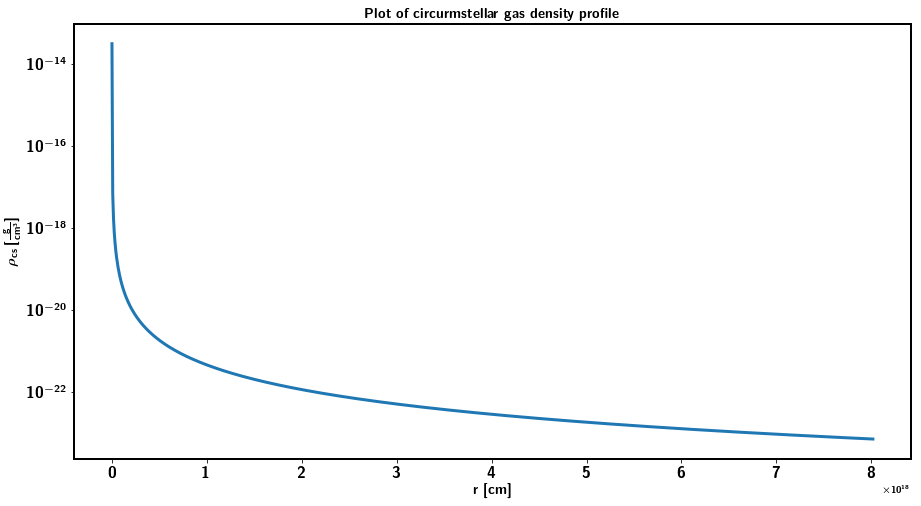

In [52]:
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.plot(rad, density, '-', lw=3)
ax.set_title(r'\textbf{Plot of circurmstellar gas density profile}', fontsize=14)
ax.set_xlabel(r'\textbf{r [cm]}', fontsize=14)
ax.set_ylabel(r'$\rho_{cs} \, [\frac{g}{cm^3}]$', fontsize=14)
ax.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')
# A traditional log-linear plot
#ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

## Contact Discontinuity shell radius evolution

With the assumption of the standard model of Chevalier (1982b) where the hydrodynamic evolution of the ejecta is self-similar across the contact discontinuity. With this assumption the radius of the shocked ejecta shell evolves as

\begin{equation}
R \propto t^{m}
\end{equation}

The interaction of a power law ejecta with a power law ambient medium is found to be decribed by the self-similar solution (Chevalier 1982a)

\begin{equation}
R \propto \left(\frac{\dot{M}}{u_w}\right)^{m-1} t^{m}
\end{equation}

If we consider the thickness of the shocked shell to be small in comparison to its radius, its position is denoted by a single radial value

\begin{equation}
R = \left[\frac{(4-s)(3-s)g^n}{(n-4)(n-3)q} \right]^{\frac{1}{n-2}} t^{m}
\end{equation}

For the specific self-similar case we consider, $n=12$ and $s=2$. 
These parameters can be adjusted based on the observation dependent parameters to have a self-consistent solution reflecting the fitting of the observed light curves. Then the position of the shocked ejecta shell can be represented by


\begin{equation}
R = \left[\frac{2g^n}{(n-4)(n-3)q} \right]^{\frac{1}{n-2}} t^{m}
\end{equation}




This first function, which we call the “powerlaw” function, is an uninterrupted powerlaw, $R = R_{1\mbox{day}}\left(\frac{t}{\mbox{day}}\right)^m$, where $R$ is the radius of the supernova at time, $t$, $R_{1\mbox{day}}$ is the radius at $t = 1 \mbox{day}$, and $m$ is the powerlaw coefficient, often called the expansion parameter. Thus

\begin{equation}
 m =\frac{(n-3)}{(n-s)}
\end{equation}


The observed radio turn-ons of previous Type II supernovae have been well described by a model where the turn-on is a result of the decreasing free-free absorption of the ionized stellar wind as the supernova expands (Chevalier 1982b). Although neutral before the outburst, the radiation from the photosphere at the time of shock break-out and from the shock region ionizes and heats the wind to a high temperature **(Lundqvist & Fransson 1988)**.



In [53]:

m = (12-3)/(12-2)

q = dM/(4*np.pi*u_w)

time = np.linspace(2, 1000, 1000)*unt.day #days
time = time.to(unt.s).value

g = (1.77e9)
        
R = ((2*g**12)/(72*q))**(1/10) * (time**(m))

m

0.9

**Björnsson, C.-I., Lundqvist, P. (2014)**
External free–free absorption is sensitive to the density and temperature of the circumstellar medium. It was recognized early on (Chevalier 1982b) that the turn-over of the radio spectrum at low frequencies seen in several supernovae could, at least in part, be due to free–free absorption. With good enough data in the low frequency range, free–free absorption can be separated from a possible contribution from synchrotron self- absorption. Even though the circumstellarmedium can normally be assumed to be fully ionized (e.g., Chevalier 1982b), a limiting factor for those cases where free–free absorption is apparent is the sensitivity of the deduced mass-loss rate to its temperature. Usually this is dealt with by either assuming the temperature to have a given prescribed value (e.g., Weiler et al. 2002) or by parameterizing the temperature and deduce the relevant parameters from modeling (Fransson & Bj¨ornsson 1998). In either case the accuracy of the mass-loss rate deduced from observations is no better than the assumptions made regarding the temperature.

Björnsson, C.-I. & Lundqvist, P. (2014) considers the possibility that the main heating mechanism of the circumstellar medium is free–free absorption. Observations of the resulting free–free optical depth then allows a self-consistent determination of the temperature, and hence the density. It is argued that for supernovae expanding into a hydrogen rich circumstellar medium, free–free absorption may indeed set the temperature immediately ahead of the forward shock.

Most of the heating of the circumstellar gas occurs within one scale height in front of the forward shock, is the shock velocity. The energy is absorbed by the electrons so i.e., during a time $t ≈ R/V_{sh}$, where $R$ is the shock radius and $T$ is the electron temperature.



Distance from the central of explosion to the outer shock front at 1000 days 4.16e+16 cm


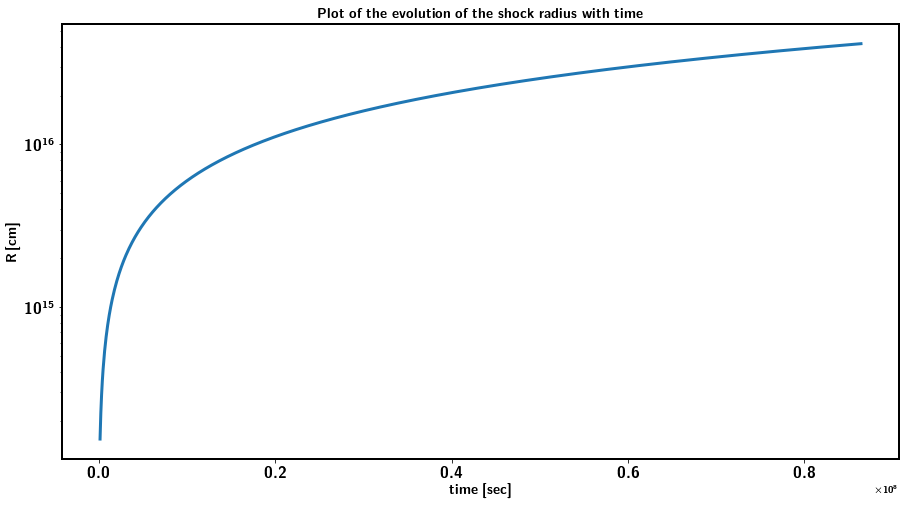

In [54]:
fig, ax = plt.subplots(1, figsize=(15, 8))
ax.plot(time, R, '-', lw=3)
ax.set_title(r'\textbf{Plot of the evolution of the shock radius with time}', fontsize=14)
ax.set_xlabel(r'\textbf{time [sec]}', fontsize=14)
ax.set_ylabel(r'$R\, [cm]$', fontsize=14)
ax.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')
# A traditional log-linear plot
#ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
print('\n')
print('Distance from the central of explosion to the outer shock front at 1000 days', 
      '{:.2e} cm'.format(R[-1]))

In [55]:
# Using Figure 9 of Beswick(2006) and data by Marcaide et al (1994), 
# we calculate the expected size of the supernova blast radius
t = 2.2e-3*unt.arcsec
D = 3.6e6*unt.pc
d = (t/(206265*unt.arcsec))*D
print('Size of SN 1993J after 1000 days', '{:.2e}'.format(d.to(unt.cm))) #at 1000 days

Size of SN 1993J after 1000 days 1.18e+17 cm


In [56]:
# Using the computed results of interaction shell radius R
# I obtain the angular extent of the SN explosion 

dd = R[-1]*unt.cm
dd = dd.to(unt.pc)
arc = 206265*unt.arcsec * (dd/D)

print('Angular extend of model SN after 1000 days', '{:.5f}'.format(arc)) #at 1000 days

Angular extend of model SN after 1000 days 0.00077 arcsec


## Ejecta density structure

Within the first day of the after the explosion, the density profile of the ejecta is set up and the SN starts to expand homologously. The inner part of the the ejecta is expected to have a flat density profile. The outer structure could be described by a steep power law. This outer part of the ejecta interacts with the CSM and results in radiation at different wavelegnths. Therefore, the structure of the outer region plays an important role in predicting the observed emission. If $\rho_{sh}$ represents the expanding interaction shell density as a function of radius $r$, we can write the density of the outer edge as

\begin{equation}
 \rho_{sh} \propto r^{-n}
\end{equation}

The power law index $n$ of the outer part of the ejecta depends on the nature of the star. For a star with  convective (radiative) envelope, $n$ is found to be around 12. The density of the ejecta material decreases as $t^{-3}$, where $t$ represents the time since explosion. Therefore, the density of the outer part can be written as

\begin{equation}
 \rho_{sh} = \rho_0 \left(\frac{r}{V_0\, t} \right)^{-n} \left(\frac{t}{t_0} \right)^{-3}
\end{equation}

Here, $\rho_0$ represents the density of the ejecta at radius $r_0$, corresponding to a velocity $V_0$ at time $t_0$.The above equation is mainly valid for SNe for which the explosion energy is produced at the center of the star. This is usually true for core collapse SNe. This profile applies up to the end point of the ejecta which is moving with a maximum velocity of $V_{max}$. The density of the uniformly expanding ejecta shell can be rewritten

\begin{equation}
\rho_{sh} = \left(\frac{r}{tg} \right)^{-n} t^{-3}
\end{equation}

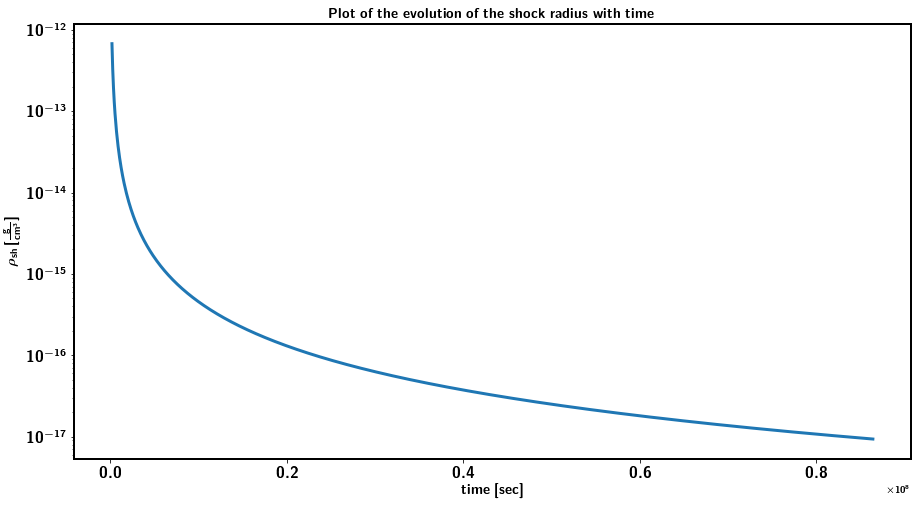

In [57]:
density_shock = ((R)/(time*g))**(-12) * time**(-3)


fig, ax = plt.subplots(1, figsize=(15, 8))
ax.plot(time, density_shock, '-', lw=3)
ax.set_title(r'\textbf{Plot of the evolution of the shock radius with time}', fontsize=14)
ax.set_xlabel(r'\textbf{time [sec]}', fontsize=14)
ax.set_ylabel(r'$\rho_{sh} \, [\frac{g}{cm^3}]$', fontsize=14)
ax.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')
# A traditional log-linear plot
#ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

The synchrotron spectrum is characterized by a self-absorption frequency νabs. Assume that the optical depth to free–free absorption at $\nu_{abs}$ is less than unity, i.e., $\tau_{ff} (\nu_{abs}) < 1$. In this case most of the absorbed energy comes from around $\nu_{abs}$. Finally we asssume the electron(hense all ionized gas) temperature in the circumstellar medium to be $T = 2\times10^{4} \mbox{K}$ according to  **Weiler K. et al (2007)**. The circumstellar medium is assumed to be fully ionized. This is also taken to be the temperature of the circumstellar medium.

In [58]:
T = 2e4 #Kelvins


The photons collected by our telescopes carry with them information about the temperature, density, and chemical composition of the atmospheric layers from which they have escaped. In order to decode this information we must understand how light travels through the gas which makes up a star. We define the specific intensity (or simply the intensity) $I_{\lambda}$ as,

\begin{equation}
 E_{\lambda} d\lambda = I_{\lambda} \, d\lambda \, dt \, dA \cos{\theta}\sin{\theta} \, d\theta d\phi
\end{equation}

as the amount of electromagnetic radiation energy with wavelength between $\lambda$ and $\lambda + d\lambda$ that passes in time $dt$ through the star surface area $dA$ into a solid angle $d\Omega$. Thus the units of intensity are (in the cgs systems used by astronomers) $[\mbox{erg} \, \mbox{s}^{-1} \mbox{cm}^{-2} \, Å^{-1} \, \mbox{sr}^{-1}]$. The mean intensity $J_{\lambda}$ is obtained by integrating the intensity over all directions and dividing by the solid angle enclosed by a sphere, which is $4\pi \, \mbox{sr}$. Thus,

\begin{equation}
 J_\lambda = \frac{1}{4\pi}\int I_{\lambda} d\Omega
\end{equation}

For an isotropic radiation field, $J_\lambda = I_\lambda$. As the gas particles collide with one another and interact with the radiation field by absorbing and emitting photons, the description of the processes of excitation and ionisation becomes quite complex. Despite all of this complications, we can still apply the the approximation of Local Thermodynamic
Equilibrium (LTE), provided the typical distance travelled by particles and photons between collisions (their mean free path) is small compared to the scale over which the temperature changes significantly. You can think of this situation as the particles and photons being confined to a limited volume of nearly constant temperature.



As a beam of light of intensity $I_{\lambda}$ travels through a gas, some of the photons will be removed through scattering off and absorption by ions, atoms and molecules in the gas. We can write:

\begin{equation}
 dI_{\lambda} = -\kappa_{\lambda} \, \rho \, I_{\lambda} \,ds
\end{equation}

where $ds$ is the distance travelled, $\rho$ is the density of the gas and $\kappa_{\lambda}$ is the
absorption coefficient, or **opacity**. In terms of the photon **mean free path**,

\begin{equation}
\mu = \frac{1}{\kappa_{\lambda} \, \rho} = \frac{1}{\sigma_{\lambda} \, n}
\end{equation}

where $\sigma_{\lambda}$ is the cross-section for interaction and $n$ is the number density of particles. From these definitions, $\kappa_{\lambda}$ has units of $[\mbox{cm}^2 \, \mbox{g}^{-1}]$, $\rho$ has units $[\mbox{g} \, \mbox{cm}^{-3}]$, $\sigma_{\lambda}$ in $[\mbox{cm}^2]$ and $n$ is in $[\mbox{cm}^{-3}]$, making $\mu$ with units $\mbox{cm}^{-1}$. Thus, both products on the denominators of the above equation can be thought of as the fraction of photons scattered off the beam per $\mbox{cm}$ travelled. We define the (dimensionless) **optical depth** as:

\begin{equation}
 \tau_{\lambda} = \int^s_0 \kappa_{\lambda} \, \rho ds'
\end{equation}

In the case of a photon travelling from the stellar interior to the surface, $s = 0$ at the starting point. Thus,
we can think of the optical depth as the number of mean free paths for the photon, from a given location in the star’s interior to the surface. Given the differential opacity equation above, we have

\begin{equation}
 I_{\lambda} = I_{\lambda_0} e^{-\tau_{\lambda}}
\end{equation}

where $I_{\lambda_0}$, is the intensity at wavelength $\lambda$ that would be measured in the absence of absorption/scattering. Gas with $\tau_{\lambda} >> 1$ is said to be optically thick; conversely, if $\tau_{\lambda} << 1$ the gas is optically thin. From the above, it can be appreciated that we typically do not see deeper into a stellar atmosphere (at a given wavelength) than unit optical depth, i.e. $\tau_{\lambda} \approx 1$. From the definition of opacity obove, it is obvious that if the opacity $\tau_{\lambda} \approx 1$ increases at some wavelength, then $ds$
must be smaller to satisfy this condition.

Mean opacity averaged over all wavelengths allows us to see the behaviour of opacity $\kappa_{\lambda}$ increasing with density at fixed temperature (as one may expect). For free-free absorption, the optical depth from the radio emitting region close to the shock through the circumstellar medium decreases as the shock wave expands, explaining the radio turn-on. When a free electron passes an ion, they temporarily form an (unbound) system capable of absorbing electromagnetic radiation of any frequency. The frequency dependent opacity associated with such free-free absorption was originally characterized by Kramers, and has the form

\begin{equation}
  \kappa_{\nu} \propto \nu^{-3}\, n_e\, T^{1/2}
\end{equation}

where ${\nu}$ is the frequency dependent opacity, $n_e$ is the number density of free electrons, and $T$ is a characteristic temperature. If free-free opacity is the only (or dominant) opacity source in the star, then
we can go ahead and calculate the Rosseland mean opacity as

\begin{equation}
  \kappa \propto  n_e\, T^{-7/2}
\end{equation}

The absorption coefficients of the two most important low frequency absorption mechanisms, free-free and synchrotron-self absorption, are rather steeply decreasing functions of frequency $\nu$:

\begin{equation}
  \kappa_{ff} \propto  n_e^2\, T^{-1.5}\, \nu^{-2.1}
\end{equation}

\begin{equation}
  \kappa_{ss} \propto   \nu^{-(\gamma+4)/2}
\end{equation}

where $\gamma$ is the energy spectral index of an assumed power law distribution of relativistic electrons **(Marscher, P. 1979)**.

The circumstellar shell is initially ionized by the photospheric radiation produced when the shock wave first emerges from the progenitor star and remains in its ionized state by the bremsstrahlung radiation. The interaction of the expanding supernova envelope with the circumstellar matter creates a hot shell within the interaction region which emits bremsstrahlung radiation. The bremsstrahlung emission determines the ionization just outside the hot shell **(Chevalier, R. 1981)**. The hot shell itself is expected to be thin to free-free absorption, partially because the absorption coefficient is proportional to $T^{3/2}$. **Chevalier, R. 1981)** shows thaat the free-free optical depth of the circumstellar gas is

\begin{equation}
\tau_{\nu} = 0.005 \left(\frac{\dot{M}}{u_w} \right)^2 \left(\frac{\nu}{1.4\, \mbox{GHz}}\right)^{-2} \left(\frac{R}{2\times10^{16}\,\mbox{cm}}\right)
\end{equation}

where mass loss rate $\dot{M}$ is in units $10^{-6} M_{\odot}\, \mbox{yr}^{-1}$ and  $u_w$ is the wind velocity in units of $10\, \mbox{km}\, \mbox{s}^{-1}$.

Radio SN show early low frequency absorption, and in the standard model, this is attributed to free-free absorption by the wind outside the forward shock front. The presupernova red giant wind is neutral, but it is ionized by radiation from the shock breakout and propagation in the wind **(Chevalier, Roger A. 1996)** . Optical depth due to thermal bremsstrahlung at radio frequencies is given by **(Schwarz & Pringle, 1996)** 

\begin{equation}
   \tau_{\nu} \propto T^{-1.35}\, \nu^{-2.1}\, \int_0^s \rho^{2}\, ds'
\end{equation}

Assuming ion temperature to be constant, **(Schwarz & Pringle, 1996)**, solved the integration along a line-of-sight path though the absorbing material starting at an arbitrary point on the surface of the outer shock front for the optical depth in the mini-shell model and found the following expression

\begin{equation}
   \tau_{\nu} \propto \left( \frac{\dot{M}}{u_w}  \right)^{5+\delta} t^{\delta} \nu^{-2.1} \left[\frac{\theta - \frac{1}{2}\sin{2\theta}}{2\sin^3{\theta}} \right]
\end{equation}

where $\theta$ is the angle between the radial line from the center of the supernova to the arbitrary point on the surface of the outer shock front and the line-of-sight. 

According to **Chevalier, R. 1982b**, if the absorption in the circumstellar medium is due to free-free absorption, then the optical depth takes the form

\begin{equation}
   \tau_{\nu} \propto \left( \frac{\dot{M}}{u_w}\, \right)^{2}\, R^{-3}\, \nu^{-2}
\end{equation}

It is further improved in Equation 7 of **Chevalier, R. 1998** as

\begin{equation}
   \tau_{\nu} \propto \left( \frac{\dot{M}}{u_w}\, \right)^{2}\, R^{-3}\, \nu^{-2.1}
\end{equation}


When the equation of the evolution of SN interaction shell radius $R$ is used to substitude for $R$ above, the quantity $g^n$ has been kept in the expression because it is proportional to the supernova density at a given material velocity, they arrive at this following expression 

\begin{equation}
   \tau_{\nu} \propto (g^n)^{-3(1-m)} \left( \frac{\dot{M}}{u_w}  \right)^{5-3m} t^{-3m}\, \nu^{-2.1}
\end{equation}
\begin{equation}
   \tau_{\nu} \propto (g^n)^{-3(1-m)} \left( \frac{\dot{M}}{u_w}  \right)^{5+\delta} t^{\delta}\, \nu^{-2.1}
\end{equation}

where the constant $\delta$ is observation derived parameter. A search of parameter space for minimum reduced $\chi^2$ with equations 1 and 2 of **(Weiler et al. 1986)** will yield an initial set of parameters values for any SN. These values can be used to calculate the model radio light curves of which ($\delta = \alpha - \beta -3$) is fixed.

For free-free absorption, the emission along the line of sight to the center of the SN is attenuated by a factor $e^{\tau}$, where 
\begin{equation}
   \tau_{\nu} \propto \left( \frac{\dot{M}}{u_w}\, \right)^{2}\, R^{-3}\, T^{-1.35}\, \nu^{-2.1}
\end{equation}


According to the results of Weiler et al.(1991), the time dependence of the optical depth in the local homogenous medium is given by the fixed  value $\delta$ 

\begin{equation}
 \delta = -3m
\end{equation}

In [59]:
# I compute the value of delta based on the deceleration parameter in the shell radius
delta = -3*m


In [83]:
# Due to different turn on's of frequency as the shock radius increase
# We generate a list of frequencies observable by radio telescopes when detecting radio supernovae 

wavelengths = [21.41, 6.11, 3.61, 2.14, 1.30] # cm
frequencies = [1.4, 4.9, 8.3, 14, 23] # GHz
frequencies = np.array(frequencies)*1e9

fq = 1.4*unt.GHz
fq = fq.to(unt.Hz).value


In [84]:

# Calculating the optical depth from the emission of the shocked material.
optical_depth =  (dM/u_w)**(5+delta) * (fq**(-2.1)) * time**(delta)


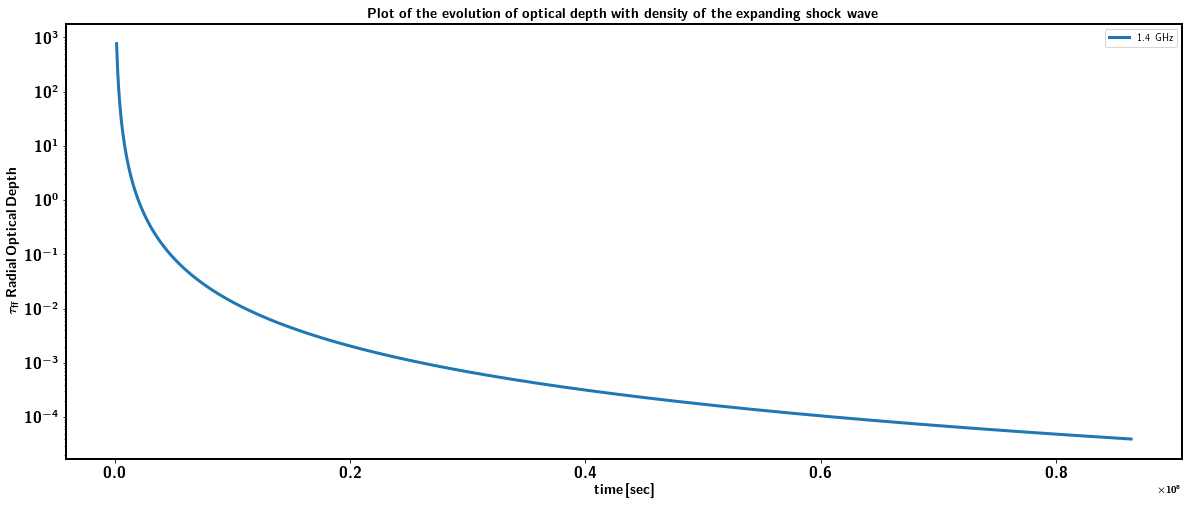

In [85]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.plot(time, optical_depth, '-', lw=3, label=r'1.4\, GHz')
ax.set_title(r'\textbf{Plot of the evolution of optical depth with density of the expanding shock wave}', fontsize=14)
ax.set_xlabel(r'$time \,[sec]$', fontsize=14)
ax.set_ylabel(r'$\tau_{ff}\, Radial\, Optical\, Depth$', fontsize=14)
ax.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')
# A traditional log-linear plot
#ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.legend()

### The first thing to notice is that at a fixed temperature the opacity increases with density (as one may expect)

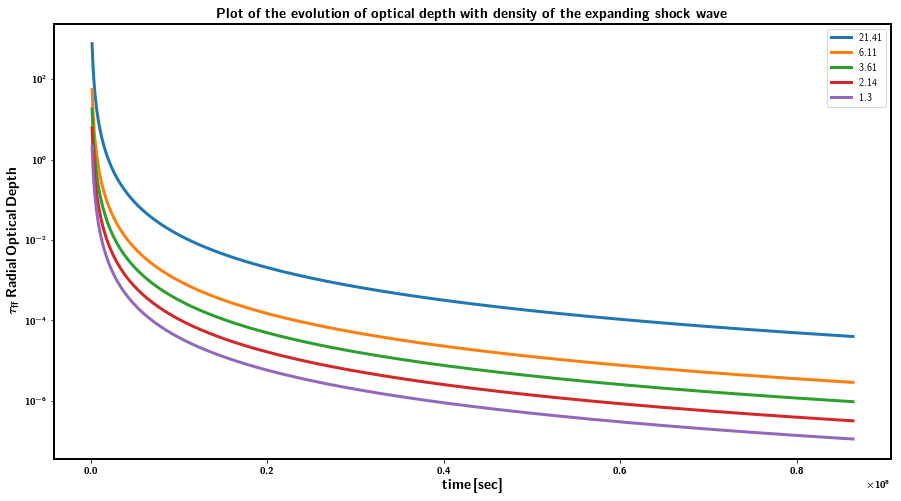

In [65]:
# To show different emission frequencies emerging fromm the opaque medium
# As the shock radius expands, we plot optical depth as s function of all frequencies 

plt.figure(1, figsize=(15, 8))
for freq in frequencies:
    
    optical_depth =  (dM/u_w)**(5+delta) * (freq**(-2.1)) * (time)**(delta)
   
    plt.plot(time, optical_depth, '-',  label='GHz', lw=3)
    plt.title(r'\textbf{Plot of the evolution of optical depth with density of the expanding shock wave}', fontsize=14)
    plt.xlabel(r'$time \,[sec]$', fontsize=14)
    plt.ylabel(r'$\tau_{ff}\, Radial\, Optical\, Depth$', fontsize=14)
    #plt.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')
    # A traditional log-linear plot
    #plt.xscale('log')
    plt.yscale('log')
    #plt.xaxis.set_tick_params(labelsize=16)
    #plt.yaxis.set_tick_params(labelsize=16)
plt.legend(wavelengths)


**WIKIPEDIA :** A solid angle (symbol: $\Omega$) is a measure of the amount of the field of view from some particular point that a given object covers. That is, it is a measure of how large the object appears to an observer looking from that point. The point from which the object is viewed is called the apex of the solid angle, and the object is said to subtend its solid angle from that point. An object's solid angle in steradians is equal to the area of the segment of a unit sphere, centered at the apex, that the object covers.

**"You take a surface. Then you project it onto a unit sphere (a sphere of radius 1). Then you calculate the surface area
of your projection. That’s it"**

A solid angle in steradians is the following ratio $\Omega = \frac{A}{r^2}$, where $A$ is the spherical surface area and $r$ is the radius of the considered sphere with the surface area of a sphere being $A = 4\pi r^2$. Thus, the solid angle of a sphere measured from any point in its interior is $4\pi \, \mbox{sr}$. In spherical coordinates there is a formula for the differential, 
$$d\Omega = \sin{\theta} \, d\theta \, d\phi$$

Solid angle ($\Omega$) is a two dimensional angle in 3-D space & it is given by the surface (double) integral as follows:

$$\Omega = \frac{A}{r^2} = \frac{ \int \int_S r^2 \sin(\theta) d\theta d\phi}{r^2} = \int \int_S \sin\theta d\theta d\phi$$

Now, applying the limits, $\theta$=
angle of longitude and $\phi$= angle of colatitude and integrating over the entire surface of a sphere, we get

$$\Omega = \int^{2\pi}_0 d\phi \int^\pi_0 \sin\theta d\theta$$

$$\Omega = \int^{2\pi}_0 d\phi[−cos\theta]^{\pi}_0 = 2\int^{2\pi}_0 d\phi = 2[\phi]^{2}_0 = 2 [2\pi]=4\pi$$

where $S$ denotes an integral over the surface (the projection of your object onto
the sphere).

![alt text](solid.png "Any area on a sphere which is equal in area to the square of its radius, when observed from its center, subtends precisely one steradian.")

The solid angle of a cone with its apex at the apex of the solid angle, and with apex angle $2\Theta$, is the area of a spherical cap on a unit sphere. Let’s say the angle, $\Theta$ (angle at which the cone opens) is fixed, since the cone doesn’t change. As it happens, this is also the colatitude $\phi$, so we can integrate $\phi$ from 0 to $\Theta$. If the circle projected by the cone lies perfectly on a line of latitude, this makes our calculation much easier, since that means we can integrate longitude $\theta$ from $0$ to $2\pi$. By computing the following double integral using the unit surface element in spherical coordinates,

\begin{equation}
\Omega = \int^{2\pi}_0  \int^\Theta_0 \sin{\phi} d\theta d\phi = \int^{2\pi}_0 d\theta \int^\Theta_0 \sin{\phi} d\phi = 2\pi\left[-\cos{\theta} \right]^{\Theta}_0 = 2\pi(1 - \cos{\Theta})
\end{equation}

![alt text](cone.png "Section of cone (1) and spherical cap (2) inside a sphere. ")

The following observation dependent parameters are taken from Table 4 of Weiler K. et al (2007) after model fitting

Using the mini-shell model described above for the emission and taking $m=0.9$ and $\gamma = 2$. In the optically thick limit, it has been assumed that the shell radius increases as $t^m$

In [66]:
# All the observation dependent parameters of SN 1993J
gamma = 2
alpha = (1 - gamma)/2
beta = -(gamma + 5 -6*m)/2
eta = (gamma - 7 + 12*m) / 4

#alpha = -0.81
#beta = -0.73
#delta = -1.88
#m = -delta/3

#gamma = 1 - 2*alpha

eta

1.4500000000000002


\begin{equation}
 S(\nu) \propto \int \nu^{\alpha}t^{\beta} \left(\frac{\dot{M}}{u_w} \right)^{\eta}e^{-\tau_{\nu}}d\Omega,
\end{equation}

$\alpha = (1-\gamma)/2$

$\beta = -(\gamma+5-6m)/2$

$\eta = (\gamma-7+12m)/4$

$\delta = -3m$

$\delta = \alpha - \beta -3$

In [55]:

#theta = np.linspace(0, 2*np.pi, 1000)
#phi = np.linspace(0, np.pi, 1000)
#phi = np.linspace(0, np.pi, 1000)

#freq = [1.4, 4.9, 8.3, 14, 23] #GHz
#f = 14*unt.GHz
#f = f.to(unt.Hz).value

#eta = (gamma - 7 + 12*m) / 4
#b = -(gamma - 5 + 6*m) / 2
#a = (1 - gamma) / 2
#eta

In [21]:

# Calculating the radio flux density from the emission of the shocked material.
def LUMINOSITY(t, mu, den, tau):

    luminosity = (mu**alpha) * (t**beta) * (den)**eta * np.exp(-tau)
    #luminosity = (mu**-0.81) * (t**-0.73) * (den)**0.78 * np.exp(-tau) * (2*np.pi*(1-np.cos(0.00203622)))
    #luminosity = (mu**alpha) * (t**beta) * (den)**eta * np.exp(-tau) * (2*np.pi*(1-np.cos(p)))
    #luminosity = (mu**alpha) * (t**beta) * (den)**eta 
    
    return(luminosity)




The synchrotron spectrum of a single electron has a logarithmic slope of 1/3 at low frequencies, a broad peak near the critical frequency $\nu$ max, and falls off sharply at higher frequencies.

\begin{equation}
1 \mbox{day} = 86400 \, \mbox{sec}
\end{equation}


\begin{equation}
1 \mbox{Jy} = 10^{-23} \frac{\mbox{erg}}{\mbox{s} \, \mbox{cm}^2 \mbox{Hz}}
\end{equation}


In [22]:
# solid angle i
ohm = np.linspace(0, 2*np.pi*(1-np.cos(0.00203622)), 1000)
#opt_sum = int_optical_depth(time, f)
lum = LUMINOSITY(time, f, (dM/u_w), optical_depth)

s = []
# intergrating over the entire solid angle and time
for j in range(len(ohm)):
    
    S_v = np.cumsum(lum[j])*ohm[j]
    s.append(S_v)
s = np.array(s)
S = s.flatten()

In [23]:
lum1 = LUMINOSITY(time, f, (dM/u_w), optical_depth)*ohm

In [24]:
flux_den = integrate.cumtrapz(lum, initial=ohm[0])


In [81]:
ohm = np.linspace(0, 2*np.pi*(1-np.cos(0.00203622)), 1000)
F_v = (dM/(4*np.pi*u_w))**eta * fq**(-2.1) * time**beta * np.exp(-optical_depth)



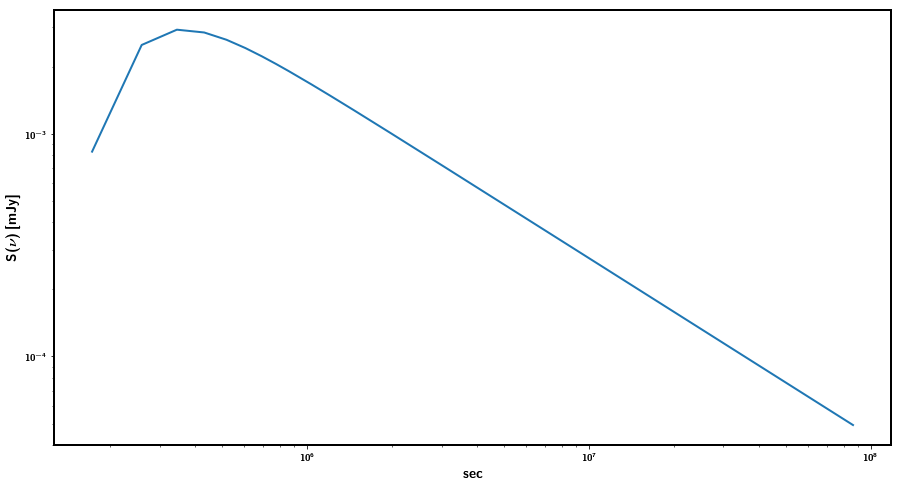

In [82]:
fig, ax = plt.subplots(1, figsize=(15, 8))
#ax.plot(np.log10(time/86400), np.log10(S_v*(10**(23)), '-')
#ax.legend(freq, loc=1)
#plt.loglog((time/86400), flux_den*(10**(23)), '-')
#plt.plot(time, flux_den*(1e23), '--', lw=2)
#plt.plot(time, lum*(1e23), '-', lw=2)
plt.plot(time, F_v, '-', lw=2)
#plt.plot(time, lum1, '-', lw=2)
#plt.plot((time/86400), S*(1e23), '-')
#plt.plot(time, S, '-')
ax.set_xlabel(r"\textbf{sec}", fontsize=14)
ax.set_ylabel(r"$S(\nu) \, [mJy]$", fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig("light_curve.png")


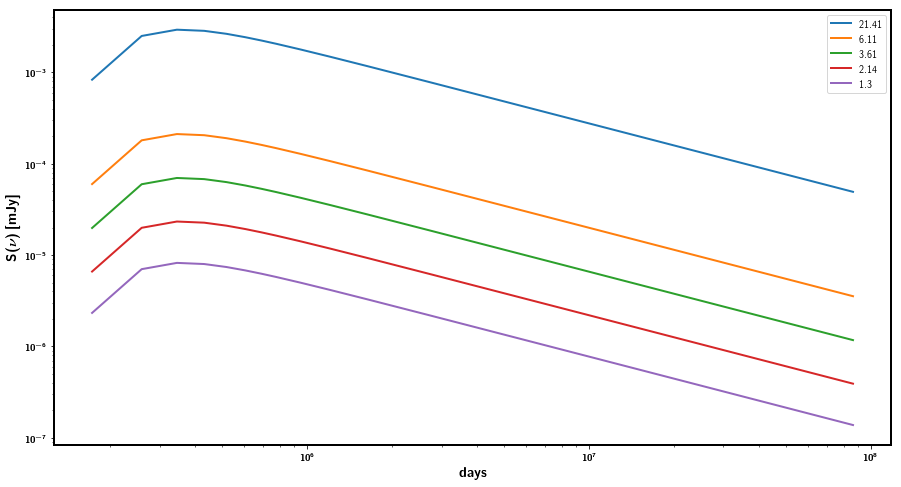

In [72]:
f = [1.4, 4.9, 8.3, 14, 23]
plt.figure(1, figsize=(15, 8))
for freq in frequencies:
    
    F_v = (dM/(4*np.pi*u_w))**eta * freq**(-2.1) * (time)**beta * np.exp(-optical_depth)

    # intergrating over the entire solid angle and time
 
    plt.plot(time, F_v, '-', lw=2)
    plt.xlabel(r"\textbf{days}", fontsize=14)
    plt.ylabel(r"$S(\nu) \, [mJy]$", fontsize=14)
    plt.yscale('log')
    plt.xscale('log')
    plt.legend(wavelengths)